In [ ]:
import pandas as pd
import numpy as np

# Adatok betöltése
weekly_log_file = "weekly_log_returns.xlsx"
heti_log_file = "heti_log.xlsx"
low_risk_weights_file = "portfolio_weights_low_risk.xlsx"
balanced_weights_file = "portfolio_weights_balanced.xlsx"
high_risk_weights_file = "portfolio_weights_high_risk.xlsx"

weekly_log_returns = pd.read_excel(weekly_log_file, index_col=0)
heti_log = pd.read_excel(heti_log_file, index_col=0)
low_risk_weights = pd.read_excel(low_risk_weights_file, index_col=0)
balanced_weights = pd.read_excel(balanced_weights_file, index_col=0)
high_risk_weights = pd.read_excel(high_risk_weights_file, index_col=0)

# Dátumok helyes formázása
weekly_log_returns.index = pd.to_datetime(weekly_log_returns.index)
heti_log.index = pd.to_datetime(heti_log.index)
low_risk_weights.index = pd.to_datetime(low_risk_weights.index)
balanced_weights.index = pd.to_datetime(balanced_weights.index)
high_risk_weights.index = pd.to_datetime(high_risk_weights.index)

# Heti hozamok és volatilitás számítása
def calculate_portfolio_return_and_volatility(weights, log_returns):
    expected_return = np.dot(weights, log_returns.mean().values)
    covariance_matrix = log_returns.cov().values
    expected_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    return expected_return, expected_volatility

# Évesített hozam kiszámítása
def calculate_annualized_return(weekly_return):
    return (1 + weekly_return) ** 52 - 1

# A számítás kezdete és vége
start_date = pd.Timestamp("2024-07-01")
end_date = pd.Timestamp("2024-11-25")

# Eredmények tárolása
portfolio_results = {
    "Low Risk": [],
    "Balanced": [],
    "High Risk": []
}

# Iteráció az időszakokon
current_date = start_date
while current_date <= end_date:
    # Az aktuális heti loghozam (52 hét + aktuális hét)
    start_range = current_date - pd.Timedelta(weeks=51)
    relevant_data = weekly_log_returns.loc[start_range:current_date - pd.Timedelta(weeks=1)]

    if len(relevant_data) < 51:
        print(f"Nincs elég adat az {current_date} dátumhoz. Skipping...")
        current_date += pd.Timedelta(weeks=1)
        continue

    # Az aktuális hét hozzáadása a heti loghoz
    try:
        current_week_return = heti_log.loc[current_date]
    except KeyError:
        print(f"Nincs heti logadat az {current_date} dátumhoz. Skipping...")
        current_date += pd.Timedelta(weeks=1)
        continue

    # Loghozamok kombinálása
    full_log_data = pd.concat([relevant_data, pd.DataFrame([current_week_return])])

    # Portfólió súlyok betöltése
    try:
        low_risk_weight = low_risk_weights.loc[current_date].values
        balanced_weight = balanced_weights.loc[current_date].values
        high_risk_weight = high_risk_weights.loc[current_date].values
    except KeyError:
        print(f"Súlyok hiányoznak az {current_date} dátumhoz. Skipping...")
        current_date += pd.Timedelta(weeks=1)
        continue

    # Várható hozamok és volatilitások számítása
    low_risk_return, low_risk_volatility = calculate_portfolio_return_and_volatility(low_risk_weight, full_log_data)
    balanced_return, balanced_volatility = calculate_portfolio_return_and_volatility(balanced_weight, full_log_data)
    high_risk_return, high_risk_volatility = calculate_portfolio_return_and_volatility(high_risk_weight, full_log_data)

    # Évesített hozamok számítása
    low_risk_annual_return = calculate_annualized_return(low_risk_return)
    balanced_annual_return = calculate_annualized_return(balanced_return)
    high_risk_annual_return = calculate_annualized_return(high_risk_return)

    # Eredmények tárolása
    portfolio_results["Low Risk"].append((current_date, low_risk_return, low_risk_volatility, low_risk_annual_return))
    portfolio_results["Balanced"].append((current_date, balanced_return, balanced_volatility, balanced_annual_return))
    portfolio_results["High Risk"].append((current_date, high_risk_return, high_risk_volatility, high_risk_annual_return))

    # Következő hét
    current_date += pd.Timedelta(weeks=1)

# Eredmények kiírása
for portfolio, results in portfolio_results.items():
    print(f"\n--- {portfolio} Portfolio Weekly Expected Returns and Annualized Returns ---")
    for date, exp_return, volatility, annual_return in results:
        print(f"Date: {date.strftime('%Y-%m-%d')}, Várható hozam: {exp_return:.2%}, "
              f"Volatilitás: {volatility:.2%}, Évesített hozam: {annual_return:.2%}")



--- Low Risk Portfolio Weekly Expected Returns and Annualized Returns ---
Date: 2024-07-01, Várható hozam: 0.41%, Volatilitás: 2.46%, Évesített hozam: 23.53%
Date: 2024-07-08, Várható hozam: 0.44%, Volatilitás: 2.77%, Évesített hozam: 25.93%
Date: 2024-07-15, Várható hozam: 0.50%, Volatilitás: 2.55%, Évesített hozam: 29.77%
Date: 2024-07-22, Várható hozam: 0.17%, Volatilitás: 2.75%, Évesített hozam: 9.07%
Date: 2024-07-29, Várható hozam: 0.26%, Volatilitás: 2.63%, Évesített hozam: 14.67%
Date: 2024-08-05, Várható hozam: 0.56%, Volatilitás: 3.15%, Évesített hozam: 33.64%
Date: 2024-08-12, Várható hozam: 0.62%, Volatilitás: 2.61%, Évesített hozam: 37.68%
Date: 2024-08-19, Várható hozam: 0.81%, Volatilitás: 4.82%, Évesített hozam: 51.89%
Date: 2024-08-26, Várható hozam: 1.00%, Volatilitás: 4.22%, Évesített hozam: 67.53%
Date: 2024-09-02, Várható hozam: 0.34%, Volatilitás: 3.91%, Évesített hozam: 19.08%
Date: 2024-09-09, Várható hozam: 0.28%, Volatilitás: 2.47%, Évesített hozam: 15.39%
Da

In [ ]:
import pandas as pd
import numpy as np

# Adatok betöltése
weekly_log_file = "weekly_log_returns.xlsx"
heti_log_file = "heti_log.xlsx"
low_risk_weights_file = "portfolio_weights_low_risk.xlsx"
balanced_weights_file = "portfolio_weights_balanced.xlsx"
high_risk_weights_file = "portfolio_weights_high_risk.xlsx"
qp_data_file = "weekly_performance.xlsx"

weekly_log_returns = pd.read_excel(weekly_log_file, index_col=0)
heti_log = pd.read_excel(heti_log_file, index_col=0)
low_risk_weights = pd.read_excel(low_risk_weights_file, index_col=0)
balanced_weights = pd.read_excel(balanced_weights_file, index_col=0)
high_risk_weights = pd.read_excel(high_risk_weights_file, index_col=0)

# QP adatok betöltése
qp_data = pd.read_excel(qp_data_file)

# Dátumok helyes formázása
weekly_log_returns.index = pd.to_datetime(weekly_log_returns.index)
heti_log.index = pd.to_datetime(heti_log.index)
low_risk_weights.index = pd.to_datetime(low_risk_weights.index)
balanced_weights.index = pd.to_datetime(balanced_weights.index)
high_risk_weights.index = pd.to_datetime(high_risk_weights.index)
qp_data['Date'] = pd.to_datetime(qp_data['Date'])

# Heti hozamok és volatilitás számítása
def calculate_portfolio_return_and_volatility(weights, log_returns):
    expected_return = np.dot(weights, log_returns.mean().values)
    covariance_matrix = log_returns.cov().values
    expected_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    return expected_return, expected_volatility

# Évesített hozam kiszámítása
def calculate_annualized_return(weekly_return):
    return (1 + weekly_return) ** 52 - 1

# A számítás kezdete és vége
start_date = pd.Timestamp("2024-07-01")
end_date = pd.Timestamp("2024-11-25")

# Eredmények tárolása
portfolio_results = {
    "Low Risk": [],
    "Balanced": [],
    "High Risk": []
}

# Iteráció az időszakokon
current_date = start_date
while current_date <= end_date:
    # Az aktuális heti loghozam (52 hét + aktuális hét)
    start_range = current_date - pd.Timedelta(weeks=51)
    relevant_data = weekly_log_returns.loc[start_range:current_date - pd.Timedelta(weeks=1)]

    if len(relevant_data) < 51:
        print(f"Nincs elég adat az {current_date} dátumhoz. Skipping...")
        current_date += pd.Timedelta(weeks=1)
        continue

    # Az aktuális hét hozzáadása a heti loghoz
    try:
        current_week_return = heti_log.loc[current_date]
    except KeyError:
        print(f"Nincs heti logadat az {current_date} dátumhoz. Skipping...")
        current_date += pd.Timedelta(weeks=1)
        continue

    # Loghozamok kombinálása
    full_log_data = pd.concat([relevant_data, pd.DataFrame([current_week_return])])

    # Portfólió súlyok betöltése
    try:
        low_risk_weight = low_risk_weights.loc[current_date].values
        balanced_weight = balanced_weights.loc[current_date].values
        high_risk_weight = high_risk_weights.loc[current_date].values
    except KeyError:
        print(f"Súlyok hiányoznak az {current_date} dátumhoz. Skipping...")
        current_date += pd.Timedelta(weeks=1)
        continue

    # Várható hozamok és volatilitások számítása
    low_risk_return, low_risk_volatility = calculate_portfolio_return_and_volatility(low_risk_weight, full_log_data)
    balanced_return, balanced_volatility = calculate_portfolio_return_and_volatility(balanced_weight, full_log_data)
    high_risk_return, high_risk_volatility = calculate_portfolio_return_and_volatility(high_risk_weight, full_log_data)

    # Évesített hozamok számítása
    low_risk_annual_return = calculate_annualized_return(low_risk_return)
    balanced_annual_return = calculate_annualized_return(balanced_return)
    high_risk_annual_return = calculate_annualized_return(high_risk_return)

    # Eredmények tárolása
    portfolio_results["Low Risk"].append((current_date, low_risk_return, low_risk_volatility, low_risk_annual_return))
    portfolio_results["Balanced"].append((current_date, balanced_return, balanced_volatility, balanced_annual_return))
    portfolio_results["High Risk"].append((current_date, high_risk_return, high_risk_volatility, high_risk_annual_return))

    # Következő hét
    current_date += pd.Timedelta(weeks=1)

# QP heti hozamok és volatilitások kiírása
print("\n--- QP Modell Weekly Returns and Volatility ---")
for _, row in qp_data.iterrows():
    print(f"Date: {row['Date'].strftime('%Y-%m-%d')}, Várható hozam: {row['Expected Return']:.2%}, "
          f"Volatilitás: {row['Volatility']:.2%}")

# Évesített hozam számítása a QP modellhez
qp_weekly_returns = qp_data['Expected Return']
qp_annualized_return = calculate_annualized_return(qp_weekly_returns.mean())

# QP modell évesített hozam kiírása
print("\n--- QP Modell Annualized Return ---")
print(f"Évesített hozam: {qp_annualized_return:.2%}")

# Eredmények kiírása a többi portfólióhoz
for portfolio, results in portfolio_results.items():
    print(f"\n--- {portfolio} Portfolio Weekly Expected Returns and Annualized Returns ---")
    for date, exp_return, volatility, annual_return in results:
        print(f"Date: {date.strftime('%Y-%m-%d')}, Várható hozam: {exp_return:.2%}, "
              f"Volatilitás: {volatility:.2%}, Évesített hozam: {annual_return:.2%}")



--- QP Modell Weekly Returns and Volatility ---
Date: 2024-07-01, Várható hozam: 0.15%, Volatilitás: 1.86%
Date: 2024-07-08, Várható hozam: 0.16%, Volatilitás: 1.86%
Date: 2024-07-15, Várható hozam: 0.24%, Volatilitás: 1.89%
Date: 2024-07-22, Várható hozam: 0.24%, Volatilitás: 1.89%
Date: 2024-07-29, Várható hozam: 0.31%, Volatilitás: 1.73%
Date: 2024-08-05, Várható hozam: 0.30%, Volatilitás: 1.79%
Date: 2024-08-12, Várható hozam: 0.38%, Volatilitás: 1.80%
Date: 2024-08-19, Várható hozam: 0.39%, Volatilitás: 1.80%
Date: 2024-08-26, Várható hozam: 0.37%, Volatilitás: 1.79%
Date: 2024-09-02, Várható hozam: 0.47%, Volatilitás: 1.73%
Date: 2024-09-09, Várható hozam: 0.41%, Volatilitás: 1.75%
Date: 2024-09-16, Várható hozam: 0.44%, Volatilitás: 1.76%
Date: 2024-09-23, Várható hozam: 0.48%, Volatilitás: 1.74%
Date: 2024-09-30, Várható hozam: 0.49%, Volatilitás: 1.75%
Date: 2024-10-07, Várható hozam: 0.48%, Volatilitás: 1.78%
Date: 2024-10-14, Várható hozam: 0.65%, Volatilitás: 1.71%
Date: 2

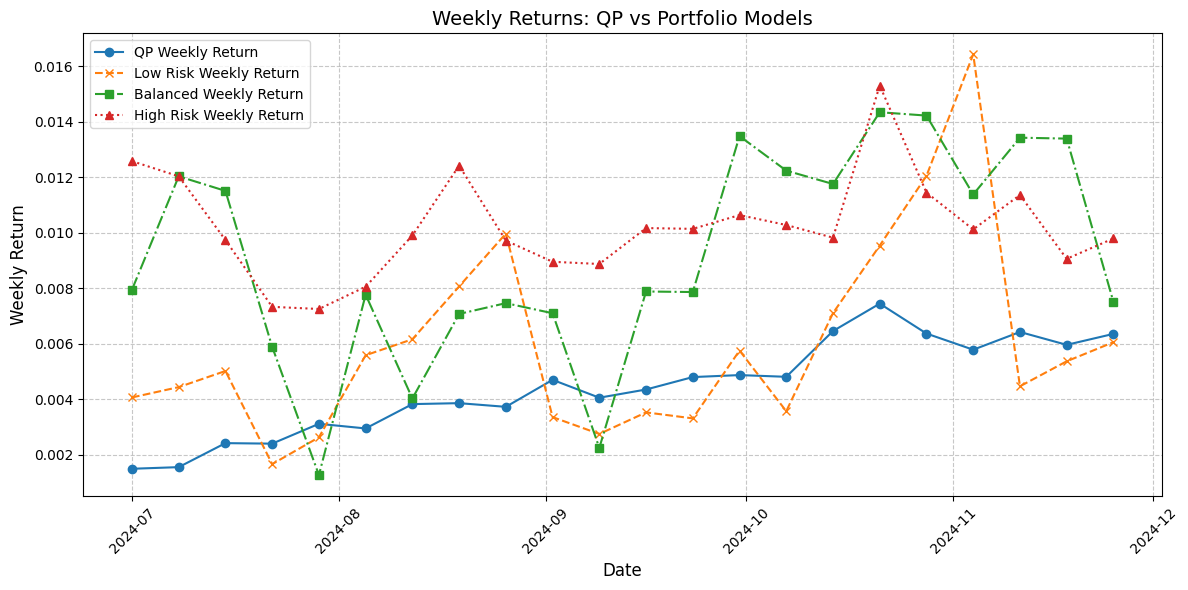

In [ ]:
import matplotlib.pyplot as plt

# Dátumok és hozamok a QP modellhez
qp_dates = qp_data['Date']
qp_weekly_returns = qp_data['Expected Return']

# Dátumok és hozamok a portfóliókhoz
low_risk_dates = [res[0] for res in portfolio_results["Low Risk"]]
low_risk_weekly_returns = [res[1] for res in portfolio_results["Low Risk"]]

balanced_dates = [res[0] for res in portfolio_results["Balanced"]]
balanced_weekly_returns = [res[1] for res in portfolio_results["Balanced"]]

high_risk_dates = [res[0] for res in portfolio_results["High Risk"]]
high_risk_weekly_returns = [res[1] for res in portfolio_results["High Risk"]]

# Ábrázolás
plt.figure(figsize=(12, 6))
plt.plot(qp_dates, qp_weekly_returns, label="QP Weekly Return", linestyle='-', marker='o')
plt.plot(low_risk_dates, low_risk_weekly_returns, label="Low Risk Weekly Return", linestyle='--', marker='x')
plt.plot(balanced_dates, balanced_weekly_returns, label="Balanced Weekly Return", linestyle='-.', marker='s')
plt.plot(high_risk_dates, high_risk_weekly_returns, label="High Risk Weekly Return", linestyle=':', marker='^')

# Diagram beállítások
plt.title("Weekly Returns: QP vs Portfolio Models", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Weekly Return", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc="upper left", fontsize=10)
plt.tight_layout()

# Diagram mentése és megjelenítése
plt.savefig("weekly_returns_comparison.png")
plt.show()
